# Supervised Machine Learning

Contents:
- 01 Import libraries and data
- 02 Data cleaning and wrangling
- 03 Data Prep for regression analysis
- 04 Regression Analysis
- 05 Improving performance after removing 0 values 

## 01 Import librbaries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'//Users/amypalomino/Documents/June 22 Final Project/02 Data'

In [4]:
# Import dataframe 

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Natural_Disasters_Final_Clean.csv'),
                index_col = False)

## 02 Cleaning and wrangling data


In [5]:
df.shape

(14644, 42)

In [6]:
# Enable max columns to be displayed 

pd.options.display.max_columns = None

In [7]:
df.head(5)

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths
0,0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,Km2,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,25000.0,15.001282,Low Death Toll
1,1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,Kph,NaN,NaN,1970,1.0,NaN,1970,1.0,NaN,13.0,0.0,0.0,0.0,0.0,NaN,NaN,72475.0,15.001282,Low Death Toll
2,2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,Km2,NaN,NaN,1970,9.0,NaN,1970,9.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,200.0,15.001282,NaN
3,3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,Kph,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,NaN,NaN,86400.0,15.001282,Very High Death Toll
4,4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,Kph,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,0.0,110.0,0.0,110.0,NaN,NaN,NaN,15.001282,Low Death Toll


In [8]:
# Drop Unnamed column
df =df.drop(columns = ['Unnamed: 0'])

In [9]:
# Check for missing values 

df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution            13967
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                   268
Start Day                    3067
End Year                        0
End Month     

In [13]:
# Dis Mag Scale contains some missing values which will mean that the Dis Mag Val will contain some records of 0. 
# As this is the variable I'd like to use in my analysis, I'll create a subset containing records with a Dis Mag Val >=1 

Mag_Val_df = df[df['Dis Mag Value'] >= 1]

In [14]:
Mag_Val_df.describe()

,Year,Seq,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI
count,4438.000000,4438.000000,4438.000000,4438.000000,4438.000000,430.000000,4.438000e+03,4438.000000,4426.000000,4125.000000,4438.000000,4391.000000,4125.000000,4438.000000,4438.000000,4.438000e+03,4.438000e+03,4.438000e+03,2.000000e+01,4.600000e+02,2.055000e+03,4390.000000
mean,2002.979045,405.009689,0.130014,0.022758,0.076160,11717.734884,5.210934e+04,2002.979270,6.566652,15.517818,2002.996620,6.651105,15.849455,451.293375,885.935782,7.532803e+05,1.758483e+04,7.717511e+05,3.468959e+06,1.250316e+06,1.152291e+06,71.665578
std,10.458769,978.679123,0.336356,0.149148,0.265285,57385.895677,3.256196e+05,10.458738,3.260129,8.913556,10.461462,3.261758,8.763842,6783.023672,10696.991472,7.610942e+06,2.726460e+05,7.726124e+06,6.280521e+06,4.453472e+06,7.218152e+06,17.852255
min,1970.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.400000e+01,4.100000e+01,2.000000e+00,15.001282
25%,1997.000000,127.000000,0.000000,0.000000,0.000000,210.250000,8.000000e+00,1997.000000,4.000000,8.000000,1997.000000,4.000000,8.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2.800000e+02,6.437500e+04,5.000000e+04,1.030000e+04,62.020757
50%,2004.000000,276.000000,0.000000,0.000000,0.000000,835.500000,1.930000e+02,2004.000000,7.000000,15.000000,2004.000000,7.000000,16.000000,7.000000,0.000000,2.500000e+03,0.000000e+00,4.504000e+03,3.690000e+05,2.000000e+05,8.400000e+04,71.078198
75%,2010.000000,463.000000,0.000000,0.000000,0.000000,4235.750000,1.618775e+04,2010.000000,9.000000,23.000000,2010.000000,9.000000,23.000000,32.000000,35.000000,4.805325e+04,0.000000e+00,5.983750e+04,3.808000e+06,7.337500e+05,4.497000e+05,84.252733
max,2021.000000,9838.000000,1.000000,1.000000,1.000000,844063.000000,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,242000.000000,366596.000000,3.000000e+08,1.585000e+07,3.000000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000000


In [22]:
Mag_Val_df.groupby('Disaster Type').agg({'Dis Mag Value':['count','min','max','mean']})

Dis Mag Value                                  
                             count     min         max          mean
Disaster Type                                                       
Drought                         51     1.0    560000.0  5.856327e+04
Earthquake                    1112     3.0         9.0  6.277788e+00
Epidemic                        50  2900.0  13025874.0  1.104192e+06
Extreme temperature            146     2.0        60.0  3.751370e+01
Flood                         1777     2.0   2857000.0  9.198198e+04
Insect infestation              11    69.0     34000.0  8.503455e+03
Landslide                        9    10.0   8000000.0  9.035897e+05
Storm                         1096    20.0       400.0  1.622336e+02
Volcanic activity                3     5.0        50.0  2.066667e+01
Wildfire                       183     1.0    680000.0  6.539623e+03

I dont think I can run a regression anaylysis using the Dis Mag Value across all disaster types as each uses a differnt scale measurement. I'd need to split the df into sub groups based on the scale measurement which would make the number of observations too small. 

In [23]:
df.groupby('Disaster Type').agg({'Dis Mag Value':['count','min','max','mean']})

Dis Mag Value                                
                              count   min         max          mean
Disaster Type                                                      
Animal accident                   1   0.0         0.0      0.000000
Drought                         685   0.0    560000.0   4360.185401
Earthquake                     1137   0.0         9.0      6.139754
Epidemic                       1436   0.0  13025874.0  38446.807799
Extreme temperature             584 -57.0        60.0      3.859589
Flood                          5272   0.0   2857000.0  31003.789264
Glacial lake outburst             2   0.0         0.0      0.000000
Impact                            1   0.0         0.0      0.000000
Insect infestation               93   0.0     34000.0   1005.784946
Landslide                       713   0.0   8000000.0  11405.760168
Mass movement (dry)              41   0.0         0.0      0.000000
Storm                          4005   0.0       400.0     44.396504
Volcanic activity               222   0.0        50.0      0.279279
Wildfire                        452   0.0    680000.0   2647.679204

The highest count across all disaster types is flood so I'll use this as my subset 

In [24]:
# Creating subset of the most commonly occuring disaster type - Flood
Flood_df = df[df['Disaster Type'] == 'Flood']

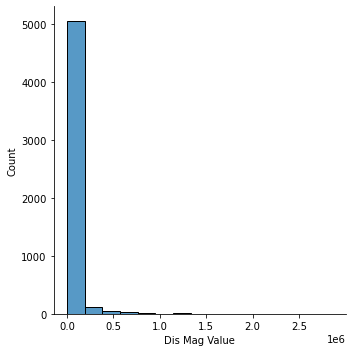

In [27]:
sns.displot(Flood_df['Dis Mag Value'], bins=15)

I might need to rethink which dependant variable I use as this choice contains too many null values. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

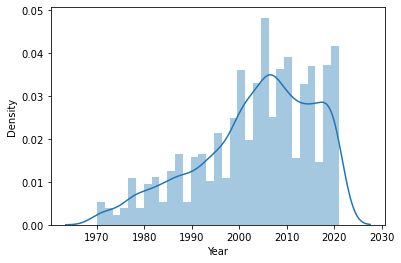

In [31]:
sns.distplot(Flood_df['Year'], bins=31)

<AxesSubplot:>

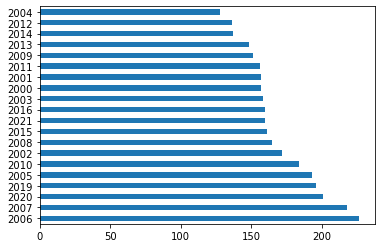

In [33]:
Flood_df['Year'].value_counts(dropna = False)[:20].plot(kind='barh')

What happened is 2006 to lead to so many instances of Flooding? 
- Apparently Typoon Utor which brought above average rainfall and affected Malaysia and Singapore and Indonesia

In [36]:
Flood_df.groupby('Continent').agg({'Year':['count','min','max','median']})

Year                    
          count   min   max  median
Continent                          
Africa     1116  1970  2021  2007.0
Americas   1204  1970  2021  2004.0
Asia       2156  1970  2021  2006.0
Europe      641  1970  2021  2005.0
Oceania     155  1971  2021  2003.0

In [37]:
Flood_df.groupby('Year').agg({'Dis Mag Value':['count','min','max','median']})

Dis Mag Value                        
             count  min        max  median
Year                                      
1970            31  0.0        0.0     0.0
1971            15  0.0     2600.0     0.0
1972            15  0.0        0.0     0.0
1973            20  0.0    15000.0     0.0
1974            19  0.0        0.0     0.0
1975            18  0.0        0.0     0.0
1976            17  0.0        0.0     0.0
1977            48  0.0      140.0     0.0
1978            47  0.0      615.0     0.0
1979            34  0.0    12789.0     0.0
1980            39  0.0    12140.0     0.0
1981            43  0.0     1205.0     0.0
1982            48  0.0      150.0     0.0
1983            49  0.0        0.0     0.0
1984            47  0.0    20234.0     0.0
1985            58  0.0   678500.0  6440.0
1986            50  0.0   269500.0     0.0
1987            68  0.0    40000.0     0.0
1988            76  0.0    60000.0     0.0
1989            46  0.0     9169.0     0.0
1990            60  0.0   438800.0     0.0
1991            77  0.0   624200.0     0.0
1992            59  0.0   545400.0     0.0
1993            84  0.0   625200.0     0.0
1994            88  0.0  1330000.0     0.0
1995            94  0.0  1668000.0     0.0
1996            92  0.0   614000.0     0.0
1997            95  0.0   689100.0     0.0
1998            94  0.0   250000.0     0.0
1999           122  0.0    50100.0     0.0
2000           157  0.0   578300.0     0.0
2001           157  0.0  2857000.0    69.0
2002           172  0.0   483000.0    85.0
2003           158  0.0  1287000.0   192.0
2004           128  0.0  1232000.0     0.0
2005           193  0.0   619200.0     0.0
2006           226  0.0  1164000.0  2645.0
2007           218  0.0  1591000.0  4600.0
2008           165  0.0  1120000.0   400.0
2009           151  0.0  1186000.0     0.0
2010           184  0.0  1140146.0     0.0
2011           156  0.0  1341347.0     0.0
2012           136  0.0  2643786.0     0.0
2013           148  0.0   645400.0     0.0
2014           137  0.0  1829701.0     0.0
2015           161  0.0   849465.0     0.0
2016           160  0.0  2440002.0     0.0
2017           127  0.0   810942.0     0.0
2018           128  0.0   629242.0     0.0
2019           196  0.0   632316.0     0.0
2020           201  0.0   443086.0     0.0
2021           160  0.0   126119.0     0.0

In [39]:
df.groupby('Disaster Type').agg({'Year':['count','min','max','median','mean']})

Year                                 
                      count   min   max  median         mean
Disaster Type                                               
Animal accident           1  2014  2014  2014.0  2014.000000
Drought                 685  1970  2021  2000.0  1998.924088
Earthquake             1137  1970  2021  2000.0  1998.920844
Epidemic               1436  1970  2021  2001.0  2000.885097
Extreme temperature     584  1971  2021  2005.0  2004.441781
Flood                  5272  1970  2021  2006.0  2003.570561
Glacial lake outburst     2  2021  2021  2021.0  2021.000000
Impact                    1  2013  2013  2013.0  2013.000000
Insect infestation       93  1974  2020  1988.0  1994.258065
Landslide               713  1970  2021  2001.0  2000.569425
Mass movement (dry)      41  1971  2018  1991.0  1994.560976
Storm                  4005  1970  2021  2002.0  2000.675406
Volcanic activity       222  1971  2021  2000.0  1999.081081
Wildfire                452  1970  2021  2001.0  2000.960177

In [40]:
df.groupby('Disaster Type').agg({'Total Deaths':['count','min','max','mean']})

Total Deaths                             
                             count   min       max         mean
Disaster Type                                                  
Animal accident                  1  12.0      12.0    12.000000
Drought                        685   0.0  300000.0  1023.027737
Earthquake                    1137   0.0  242000.0  1160.320141
Epidemic                      1436   0.0    8000.0   180.873955
Extreme temperature            584   0.0   55736.0   323.803082
Flood                         5272   0.0   30000.0    62.724393
Glacial lake outburst            2  16.0     234.0   125.000000
Impact                           1   0.0       0.0     0.000000
Insect infestation              93   0.0       0.0     0.000000
Landslide                      713   0.0    2800.0    57.134642
Mass movement (dry)             41   0.0     300.0    56.682927
Storm                         4005   0.0  300000.0   204.028464
Volcanic activity              222   0.0   21800.0   122.229730
Wildfire                       452   0.0     240.0     6.555310

In [41]:
Deaths_df = df[df['Total Deaths'] >=1]

In [42]:
Deaths_df.groupby('Disaster Type').agg({'Total Deaths':['count','min','max','mean']})

Total Deaths                              
                             count   min       max          mean
Disaster Type                                                   
Animal accident                  1  12.0      12.0     12.000000
Drought                         53   2.0  300000.0  13222.150943
Earthquake                     781   1.0  242000.0   1689.224072
Epidemic                      1217   1.0    8000.0    213.422350
Extreme temperature            472   1.0   55736.0    400.637712
Flood                         3810   1.0   30000.0     86.793438
Glacial lake outburst            2  16.0     234.0    125.000000
Landslide                      678   1.0    2800.0     60.084071
Mass movement (dry)             39   1.0     300.0     59.589744
Storm                         2902   1.0  300000.0    281.576154
Volcanic activity               56   1.0   21800.0    484.553571
Wildfire                       188   1.0     240.0     15.760638

## 03 Data Prep for regression analysis

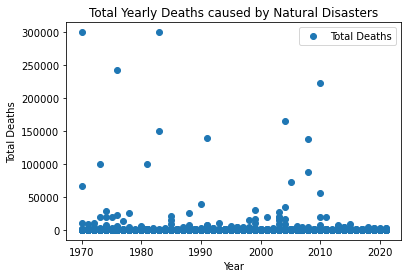

In [48]:
# Create a scatterplot using matplotlib for another look at how Deaths and Years plot against each other

Deaths_df.plot(x = 'Year', y='Total Deaths',style='o') 
plt.title('Total Yearly Deaths caused by Natural Disasters')  
plt.xlabel('Year')  
plt.ylabel('Total Deaths')  
plt.show()

This is might show the smallest negative correlation. I'm going to abandon this comparison and return to the Dis Mag Value and Floods...

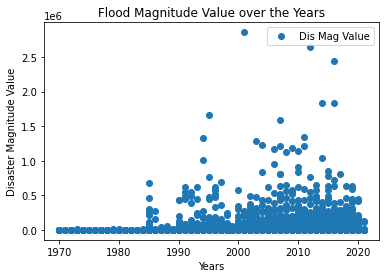

In [51]:
# Create a scatterplot using matplotlib for another look at how Floods and Years plot against each other.

Flood_df.plot(x = 'Year', y='Dis Mag Value',style='o')
plt.title('Flood Magnitude Value over the Years')  
plt.xlabel('Years')  
plt.ylabel('Disaster Magnitude Value')  
plt.show()

### Hypothesis
'Floods are occuring with more frequency and severity now than 30 years ago'

In [77]:
# Reshape the variables 

X = Flood_df['Year'].values.reshape(-1,1)
y = Flood_df['Dis Mag Value'].values.reshape(-1,1)

In [78]:
X

array([[1970],
       [1970],
       [1970],
       ...,
       [2021],
       [2021],
       [2021]])

In [79]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [80]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04 Regression analysis 

In [81]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [82]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [83]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

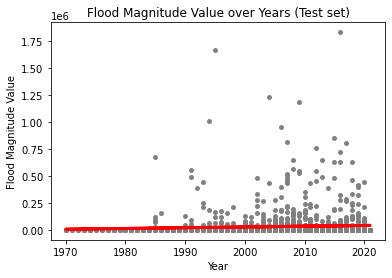

In [84]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Flood Magnitude Value over Years (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Flood Magnitude Value')
plot_test.show()

Those values of 0 are really affecting the result of my regression analysis. I can't remove them though as it would make the df too small and its worth consdiering the 0 values are significant in that they represent floods which occured but weren't as extreme.
There is a small upward direction but it's not significant in any way.

In [85]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [86]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[702.61179042]]
Mean squared error:  15166901081.900063
R2 score:  0.006632793797217151


The MSE and R2 scores confirm my suspison that this isn't a significant relationship to use for a regression model. These results are very poor

In [87]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,40077.696752
1,0.0,7757.554393
2,31653.0,37267.249590
3,15150.0,16891.507668
4,20554.0,35159.414219
5,218600.0,32348.967058
6,0.0,32348.967058
7,8.0,28133.296315
8,0.0,31646.355267
9,0.0,34456.802429


This is an alarming result. The model is predicting values that are no where near the actuals in the dataframe

### Compare how the regression fits the training set

In [89]:
# Predict

y_predicted_train = regression.predict(X_train) 

In [90]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [91]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[702.61179042]]
Mean squared error:  16674552730.03512
R2 score:  0.00436256534740187


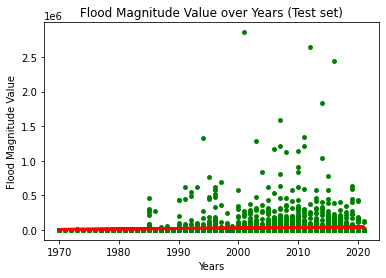

In [92]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Flood Magnitude Value over Years (Test set)')
plot_test.xlabel('Years')
plot_test.ylabel('Flood Magnitude Value')
plot_test.show()

The line does actually fit quite well compared with the training set. It's still a very insignificant relationship but there is that same small upward trend.

### 05 Improving performance after removing 0 values 

In [93]:
Flood_df_test = Flood_df[Flood_df['Dis Mag Value'] >=1]

In [96]:
Flood_df_test.shape 

# (this reduced the number of observations significantly to 1,777 which isn't great) 

(1777, 41)

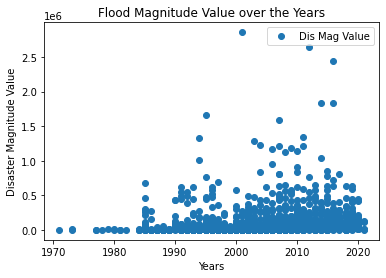

In [94]:
# Scatterplot without 0 values 

Flood_df_test.plot(x = 'Year', y='Dis Mag Value',style='o')
plt.title('Flood Magnitude Value over the Years')  
plt.xlabel('Years')  
plt.ylabel('Disaster Magnitude Value')  
plt.show()

In [97]:
# Reshape the variables 

X_2 = Flood_df_test['Year'].values.reshape(-1,1)
y_2 = Flood_df_test['Dis Mag Value'].values.reshape(-1,1)

In [98]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [99]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [100]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [101]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [102]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3074.43587147]]
Mean squared error:  36350825777.416664
R2 score:  0.017739716185971033


These scores are much improved having removed the 0 values from the Flood subset. The downside is that the model will be trained on a df that is far to small

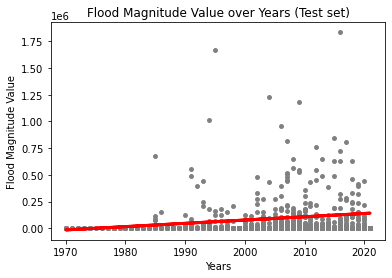

In [103]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Flood Magnitude Value over Years (Test set)')
plot_test.xlabel('Years')
plot_test.ylabel('Flood Magnitude Value')
plot_test.show()

The regression line is more significant now and shows a positive correlation.
There is a major caveat to note with this second regression analysis - due to removing the 0 values, the number of observations reduced significantly, meaning the analysis was based on a df that was far too small. It would be easier for any bias to creep in becasue of this, perhpas overinflating the relationship between the 2 variables. 